In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, ADASYN
import dendropy
from sklearn.metrics import (
    roc_auc_score,
    RocCurveDisplay,
    classification_report,
    confusion_matrix,
    accuracy_score,
)
from tada_sv import TADASV

In [2]:
# Data Loading
df = pd.read_csv("/Users/moritzgrunert/Desktop/Projects/2.Seminar/data_augmentation_microbiome/code/data/filtered_data.csv", index_col=0)
X = df.drop(columns=["diagnosis_binary"])
y = df["diagnosis_binary"]  

tree = dendropy.Tree.get(
    path="/Users/moritzgrunert/Desktop/Projects/2.Seminar/data_augmentation_microbiome/code/data/phylogeny_pruned.tre",   # dein geprunter Baum
    schema="newick",
    preserve_underscores=True,
    rooting="force-rooted",
)

In [3]:
# Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
# Augmentation

# SMOTE
smote = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)
print(f"SMOTE shape: {X_train_SMOTE.shape}")
print(y_train_SMOTE.value_counts())
print("-----")

# SMOTE on log-transformed data
X_train_log = np.log1p(X_train) # Log-transform the data
X_test_log = np.log1p(X_test)   # Log-transform the data
smote = SMOTE(random_state=42)  
X_train_SMOTE_log , y_train_SMOTE_log = smote.fit_resample(X_train_log, y_train)
print(f"SMOTE log1p shape: {X_train_SMOTE_log.shape}")
print(y_train_SMOTE_log.value_counts())
print("-----")

#ADASYN
adasyn = ADASYN(random_state=42)
X_train_ADASYN, y_train_ADASYN = adasyn.fit_resample(X_train, y_train)  
print(f"ADASYN shape: {X_train_ADASYN.shape}")
print(y_train_ADASYN.value_counts())
print("-----")

# TADA-SV
tada_sv_5 = TADASV(tree=tree, q=2 k=5, random_state=42)
X_train_TADA_SV_5, y_train_TADA_SV_5 = tada_sv.fit_resample(X_train, y_train) 
print(f"TADA-SV_5 shape: {X_train_TADA_SV_5.shape}")
print(y_train_TADA_SV_5.value_counts())
print("-----")  

# TADA-SV 50
tada_sv_50 = TADASV(tree=tree, k=50, random_state=42)
X_train_TADA_SV_50, y_train_TADA_SV_50 = tada_sv_50.fit_resample(X_train, y_train) 
print(f"TADA-SV_50 shape: {X_train_TADA_SV_50.shape}")
print(y_train_TADA_SV_50.value_counts())
print("-----")  

# TADA-SV balance
tada_sv_ba = TADASV(tree=tree, k=50, random_state=42, sampling_strategy="balance")
X_train_TADA_SV_ba, y_train_TADA_SV_ba = tada_sv_ba.fit_resample(X_train, y_train) 
print(f"TADA-SV_balance shape: {X_train_TADA_SV_ba.shape}")
print(y_train_TADA_SV_ba.value_counts())
print("-----") 

# TADA-SV balance ++
tada_sv_ba = TADASV(tree=tree, k=50, random_state=42, sampling_strategy="balance++")
X_train_TADA_SV_ba, y_train_TADA_SV_ba = tada_sv_ba.fit_resample(X_train, y_train) 
print(f"TADA-SV_balance shape: {X_train_TADA_SV_ba.shape}")
print(y_train_TADA_SV_ba.value_counts())
print("-----") 


SMOTE shape: (962, 9511)
diagnosis_binary
False    481
True     481
Name: count, dtype: int64
-----
SMOTE log1p shape: (962, 9511)
diagnosis_binary
False    481
True     481
Name: count, dtype: int64
-----
ADASYN shape: (955, 9511)
diagnosis_binary
False    481
True     474
Name: count, dtype: int64
-----


NameError: name 'tada_sv' is not defined

In [4]:
# TADA-SV balance
tada_sv_ba = TADASV(tree=tree, k=50, random_state=42, sampling_strategy="balance")
X_train_TADA_SV_ba, y_train_TADA_SV_ba = tada_sv_ba.fit_resample(X_train, y_train) 
print(f"TADA-SV_balance shape: {X_train_TADA_SV_ba.shape}")
print(y_train_TADA_SV_ba.value_counts())
print("-----")  

TADA-SV_balance shape: (962, 9511)
diagnosis_binary
False    481
True     481
Name: count, dtype: int64
-----


In [5]:
# --- TADA-SV balance ---
clf = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced",
)

clf.fit(X_train_TADA_SV_ba, y_train_TADA_SV_ba)  # Training
y_pred = clf.predict(X_test)    # Predictions
y_proba = clf.predict_proba(X_test)[:, 1] # Probabilities for ROC-AUC

# Metrics
acc_TADA_SV_ba = accuracy_score(y_test, y_pred)
auc_TADA_SV_ba = roc_auc_score(y_test, y_proba)

print("TADA-SV_balance Accuracy:", acc_TADA_SV_ba)
print("TADA-SV_balance ROC-AUC:", auc_TADA_SV_ba)
print()

TADA-SV_balance Accuracy: 0.7657142857142857
TADA-SV_balance ROC-AUC: 0.8362121212121213



In [ ]:
# Random Forest Classifier and Evaluation

# --- without Augmentation ---
clf = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced",
)

clf.fit(X_train, y_train)  # Training
y_pred = clf.predict(X_test)    # Predictions
y_proba = clf.predict_proba(X_test)[:, 1] # Probabilities for ROC-AUC

# Metrics
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print("Baseline Accuracy:", acc)
print("Baseline ROC-AUC:", auc)
print()


# --- SMOTE ---
clf = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced",
)

clf.fit(X_train_SMOTE, y_train_SMOTE)  # Training
y_pred = clf.predict(X_test)    # Predictions
y_proba = clf.predict_proba(X_test)[:, 1] # Probabilities for ROC-AUC

# Metrics
acc_SMOTE = accuracy_score(y_test, y_pred)
auc_SMOTE = roc_auc_score(y_test, y_proba)

print("SMOTE Accuracy:", acc_SMOTE)
print("SMOTE ROC-AUC:", auc_SMOTE)
print()


# --- SMOTE log1p ---
clf = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced",
)

clf.fit(X_train_SMOTE_log, y_train_SMOTE_log)  # Training
y_pred = clf.predict(X_test_log)    # Predictions
y_proba = clf.predict_proba(X_test_log)[:, 1] # Probabilities for ROC-AUC

# Metrics
acc_SMOTE_log = accuracy_score(y_test, y_pred)
auc_SMOTE_log = roc_auc_score(y_test, y_proba)

print("SMOTE log1p Accuracy:", acc_SMOTE_log)
print("SMOTE log1p ROC-AUC:", auc_SMOTE_log)
print()


# --- ADASYN ---
clf = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced",
)

clf.fit(X_train_ADASYN, y_train_ADASYN)  # Training
y_pred = clf.predict(X_test)    # Predictions
y_proba = clf.predict_proba(X_test)[:, 1] # Probabilities for ROC-AUC

# Metrics
acc_ADASYN = accuracy_score(y_test, y_pred)
auc_ADASYN = roc_auc_score(y_test, y_proba)

print("ADASYN Accuracy:", acc_ADASYN)
print("ADASYN ROC-AUC:", auc_ADASYN)
print()


# --- TADA-SV 5 ---
clf = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced",
)

clf.fit(X_train_TADA_SV_5, y_train_TADA_SV_5)  # Training
y_pred = clf.predict(X_test)    # Predictions
y_proba = clf.predict_proba(X_test)[:, 1] # Probabilities for ROC-AUC

# Metrics
acc_TADA_SV_5 = accuracy_score(y_test, y_pred)
auc_TADA_SV_5 = roc_auc_score(y_test, y_proba)

print("TADA-SV Accuracy:", acc_TADA_SV_5)
print("TADA-SV ROC-AUC:", auc_TADA_SV_5)
print()

# --- TADA-SV 50 ---
clf = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced",
)

clf.fit(X_train_TADA_SV_50, y_train_TADA_SV_50)  # Training
y_pred = clf.predict(X_test)    # Predictions
y_proba = clf.predict_proba(X_test)[:, 1] # Probabilities for ROC-AUC

# Metrics
acc_TADA_SV_50 = accuracy_score(y_test, y_pred)
auc_TADA_SV_50 = roc_auc_score(y_test, y_proba)

print("TADA-SV_50 Accuracy:", acc_TADA_SV_50)
print("TADA-SV_50 ROC-AUC:", auc_TADA_SV_50)
print()

# --- TADA-SV balance ---
clf = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced",
)

clf.fit(X_train_TADA_SV_ba, y_train_TADA_SV_ba)  # Training
y_pred = clf.predict(X_test)    # Predictions
y_proba = clf.predict_proba(X_test)[:, 1] # Probabilities for ROC-AUC

# Metrics
acc_TADA_SV_ba = accuracy_score(y_test, y_pred)
auc_TADA_SV_ba = roc_auc_score(y_test, y_proba)

print("TADA-SV_balance Accuracy:", acc_TADA_SV_ba)
print("TADA-SV_balance ROC-AUC:", auc_TADA_SV_ba)
print()


Baseline Accuracy: 0.7257142857142858
Baseline ROC-AUC: 0.8301515151515151

SMOTE Accuracy: 0.7542857142857143
SMOTE ROC-AUC: 0.8049999999999999

SMOTE log1p Accuracy: 0.7428571428571429
SMOTE log1p ROC-AUC: 0.8267424242424243

ADASYN Accuracy: 0.7485714285714286
ADASYN ROC-AUC: 0.7968939393939394



NameError: name 'X_train_TADA_SV_5' is not defined

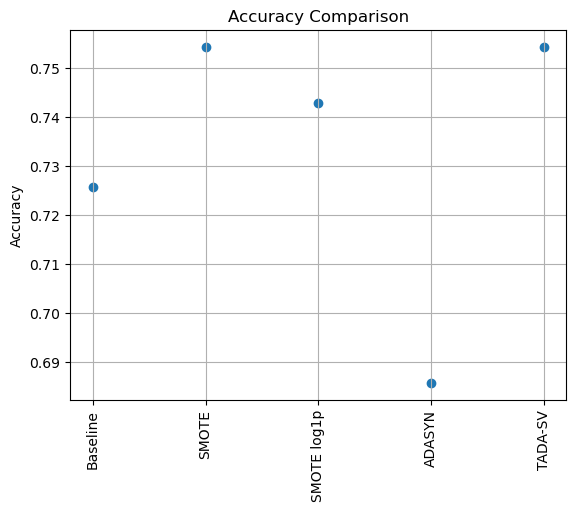

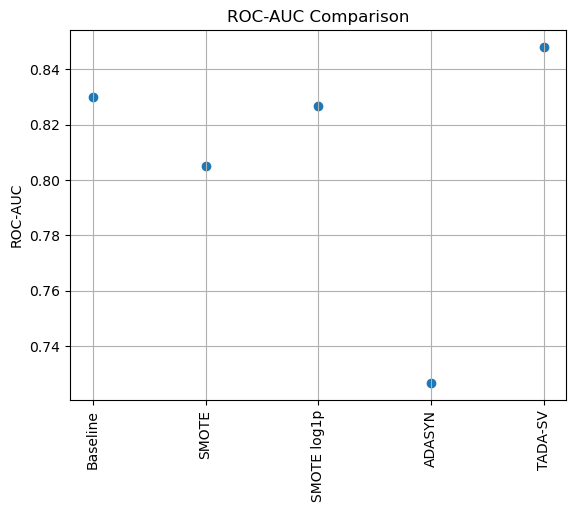

In [ ]:
plt.scatter([0, 1, 1.5, 3, 4, 4.5], [acc, acc_SMOTE, acc_SMOTE_log, acc_ADASYN, acc_TADA_SV_5, acc_TADA_SV_50], color='blue', label='Accuracy')
plt.xticks([0, 1, 1.5, 3, 4, 4.5], ["Baseline", "SMOTE", "SMOTE log1p", "ADASYN", "TADA-SV-5", "TADA-SV-50"])
plt.xticks(rotation=90)
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.grid(True)
plt.show()

plt.scatter([0, 1, 1.5, 3, 4, 4.5], [auc, auc_SMOTE, auc_SMOTE_log, auc_ADASYN, auc_TADA_SV_5, auc_TADA_SV_50], color='green', label='ROC-AUC')
plt.xticks([0, 1, 1.5, 3, 4, 4.5], ["Baseline", "SMOTE", "SMOTE log1p", "ADASYN", "TADA-SV-5", "TADA-SV-50"])
plt.xticks(rotation=90)
plt.ylabel("ROC-AUC")
plt.title("ROC-AUC Comparison")
plt.grid(True)
plt.show()  
